# Spam dataset with ensemble methods

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

In [2]:
spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9],
    'Sale':[1,2,3,3,6,7,9,10,5,8,4,6],
    'Spam': [0,0,0,0,0,0,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

spam_dataset

,Lottery,Sale,Spam
0,7,1,0
1,3,2,0
2,9,3,0
3,1,3,0
4,2,6,0
5,4,7,0
6,1,9,1
7,3,10,1
8,6,5,1
9,7,8,1


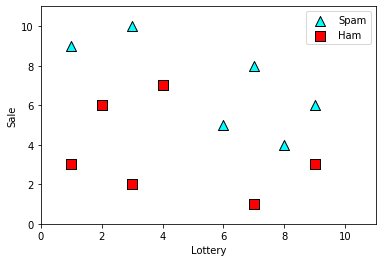

In [3]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']

utils.plot_points(X, y)

In [4]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier(random_state=0)
spam_decision_tree.fit(X,y)
spam_decision_tree.score(X,y)

1.0

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


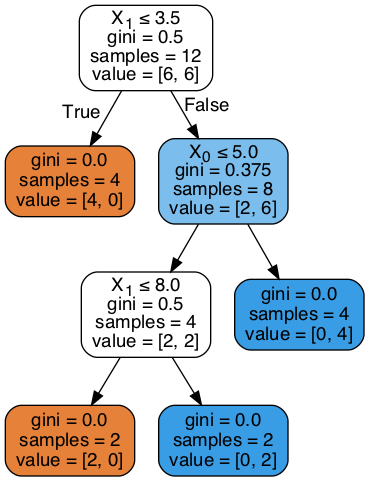

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

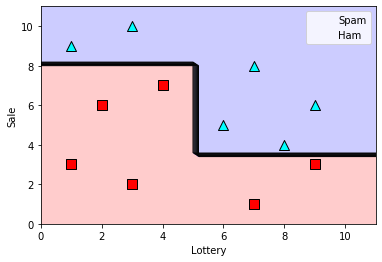

In [6]:
utils.plot_model(X, y, spam_decision_tree)

# Now with a slightly modified dataset

In [7]:
new_spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9,8,2],
    'Sale':   [1,2,3,3,6,7,9,10,5,8,4,6,5,2],
    'Spam':   [0,0,0,0,0,0,1,1,1,1,1,1,0,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

#new_spam_dataset = pd.DataFrame({
#    'Lottery':[7,3,9,1,2,4,6,1,3,6,7,8,9,3],
#    'Sale':[1,2,3,3,6,7,8,9,10,5,8,4,6,4],
#    'Spam': [0,0,0,0,0,0,0,1,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

new_spam_dataset

#new_spam_dataset = pd.DataFrame({
#    'Lottery':[7,3,9,1,2,4,8,1,3,6,7,8,9,2],
#    'Sale':[1,2,3,3,6,7,6,9,10,5,8,4,6,2],
#    'Spam': ['no','no','no','no','no','no','no','yes','yes','yes','yes','yes','yes','yes']})
#new_spam_dataset

,Lottery,Sale,Spam
0,7,1,0
1,3,2,0
2,9,3,0
3,1,3,0
4,2,6,0
5,4,7,0
6,1,9,1
7,3,10,1
8,6,5,1
9,7,8,1


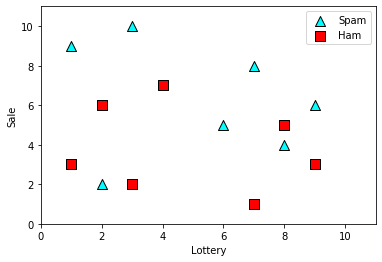

In [8]:
new_X = new_spam_dataset[['Lottery', 'Sale']]
new_y = new_spam_dataset['Spam']
utils.plot_points(new_X, new_y)

In [9]:
new_spam_decision_tree = DecisionTreeClassifier(random_state=0)
new_spam_decision_tree.fit(new_X,new_y)
new_spam_decision_tree.score(new_X,new_y)

1.0

[Text(167.4, 201.90857142857143, 'X[1] <= 7.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(139.5, 170.84571428571428, 'X[0] <= 5.0\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(83.7, 139.78285714285715, 'X[1] <= 2.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(55.800000000000004, 108.72, 'X[0] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(27.900000000000002, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(83.7, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(195.3, 139.78285714285715, 'X[1] <= 3.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(167.4, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(223.20000000000002, 108.72, 'X[1] <= 4.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(195.3, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 77.65714285714284, 'X[0] <= 7.0\ngini = 0.4

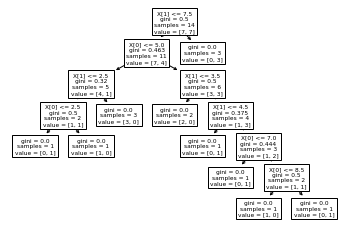

In [10]:
from sklearn import tree
tree.plot_tree(new_spam_decision_tree)

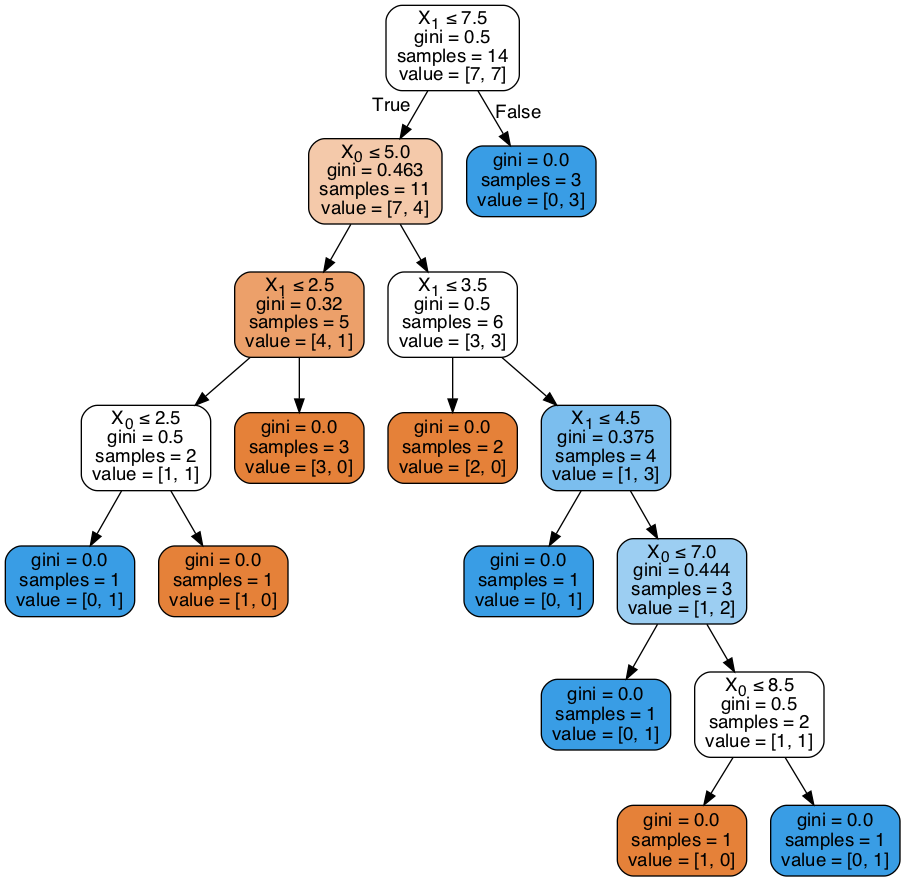

In [11]:
dot_data = StringIO()
export_graphviz(new_spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

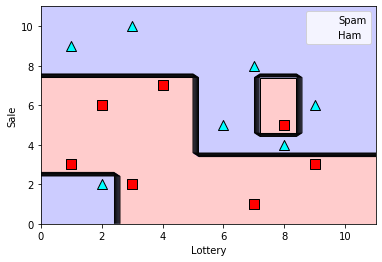

In [12]:
utils.plot_model(new_X, new_y, new_spam_decision_tree)

# Random Forests

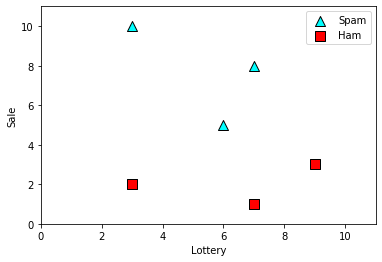

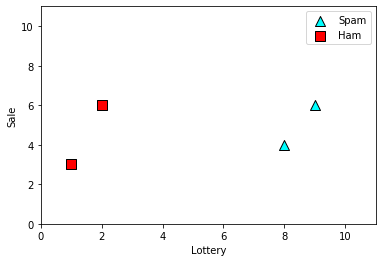

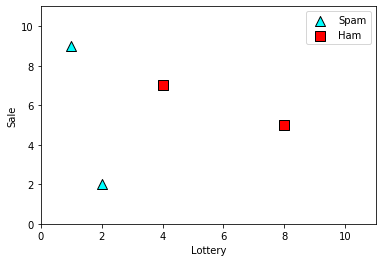

In [13]:
first_batch = new_spam_dataset.loc[[0,1,2,7,8,9]]
X1 = first_batch[['Lottery', 'Sale']]
y1 = first_batch['Spam']
utils.plot_points(X1, y1)
plt.show()

second_batch = new_spam_dataset.loc[[3,4,10,11]]
X2 = second_batch[['Lottery', 'Sale']]
y2 = second_batch['Spam']
utils.plot_points(X2, y2)
plt.show()

third_batch = new_spam_dataset.loc[[5,6,12,13]]
X3 = third_batch[['Lottery', 'Sale']]
y3 = third_batch['Spam']
utils.plot_points(X3, y3)

1.0
1.0
1.0


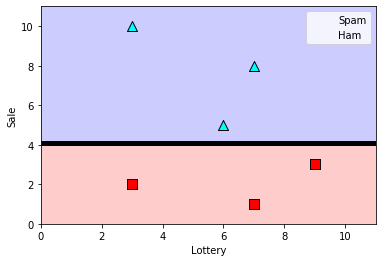

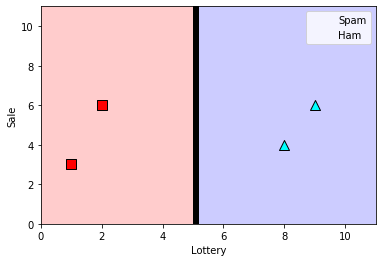

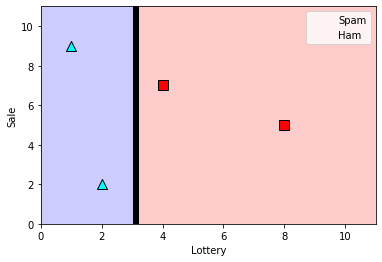

In [14]:
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(X1,y1)
print(dt1.score(X1,y1))

dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X2,y2)
print(dt2.score(X2,y2))

dt3 = DecisionTreeClassifier(random_state=0)
dt3.fit(X3,y3)
print(dt3.score(X3,y3))

utils.plot_model(X1, y1, dt1)
plt.show()
utils.plot_model(X2, y2, dt2)
plt.show()
utils.plot_model(X3, y3, dt3)

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=0, n_estimators=5)
random_forest_model.fit(new_X,new_y)
random_forest_model.score(new_X,new_y)

0.8571428571428571

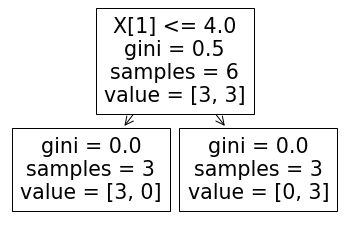

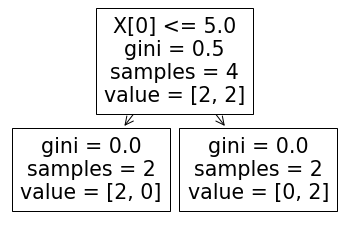

[Text(167.4, 163.07999999999998, 'X[0] <= 3.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

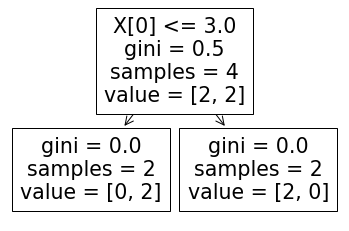

In [16]:
tree.plot_tree(dt1)
plt.show()
tree.plot_tree(dt2)
plt.show()
tree.plot_tree(dt3)

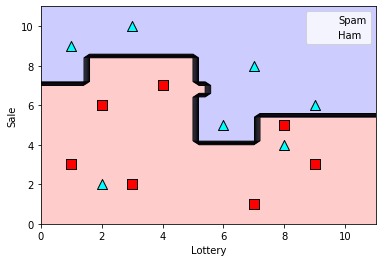

In [17]:
utils.plot_model(new_X, new_y, random_forest_model)

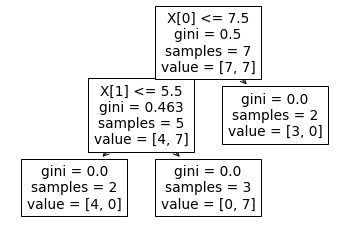

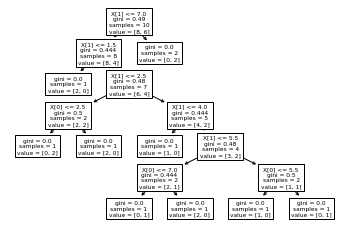

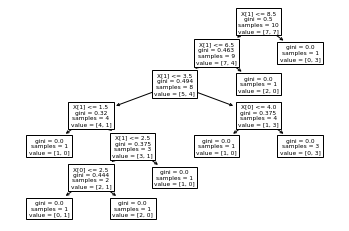

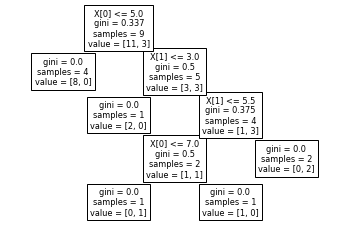

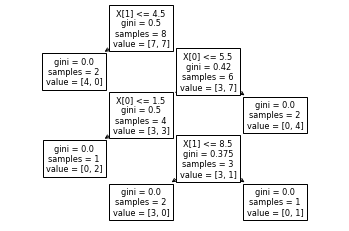

In [18]:
for dt in random_forest_model.estimators_:
    tree.plot_tree(dt)
    plt.show()

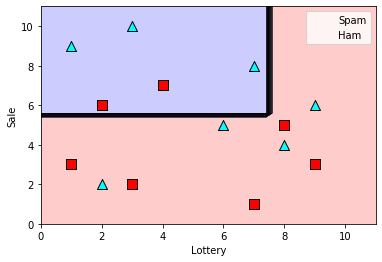

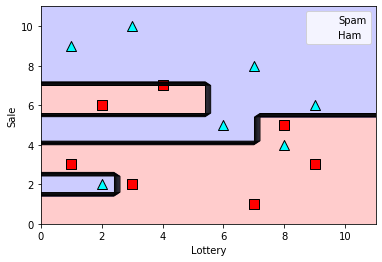

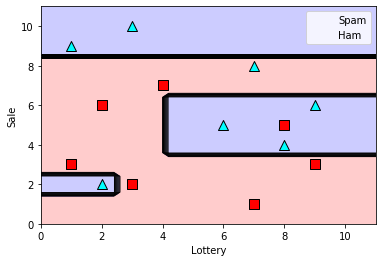

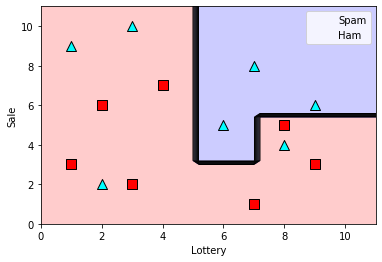

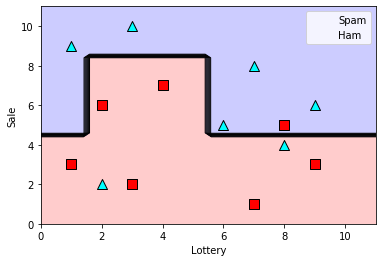

In [19]:
for dt in random_forest_model.estimators_:
    utils.plot_model(new_X, new_y, dt)
    plt.show()

# AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=0, n_estimators=6)
adaboost_model.fit(new_X, new_y)
adaboost_model.score(new_X, new_y)

0.8571428571428571

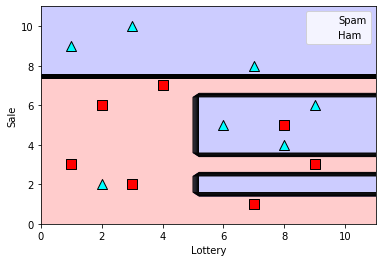

In [21]:
utils.plot_model(new_X, new_y, adaboost_model)

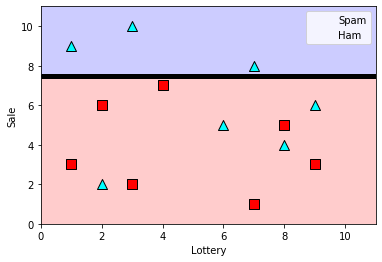

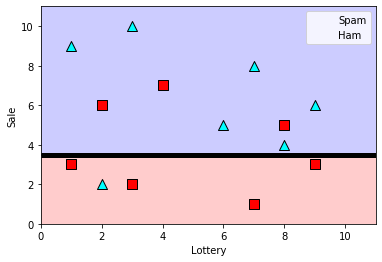

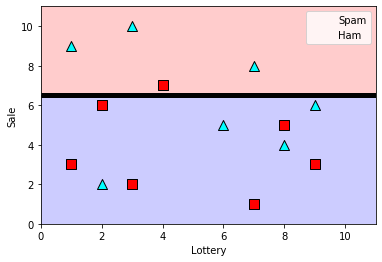

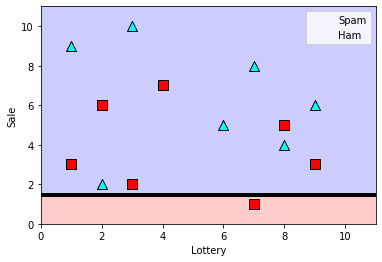

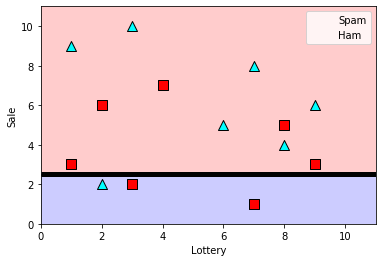

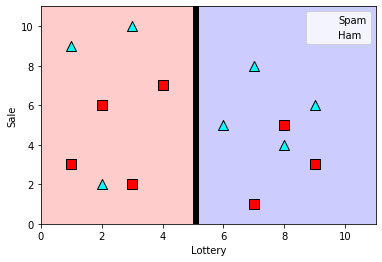

In [22]:
estimators = adaboost_model.estimators_
for estimator in estimators:
    utils.plot_model(new_X, new_y, estimator)
    plt.show()

In [23]:
adaboost_model.estimator_weights_

array([1., 1., 1., 1., 1., 1.])

# Gradient boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=0, n_estimators=5)
gradient_boosting_model.fit(new_X, new_y)
gradient_boosting_model.score(new_X, new_y)

0.9285714285714286

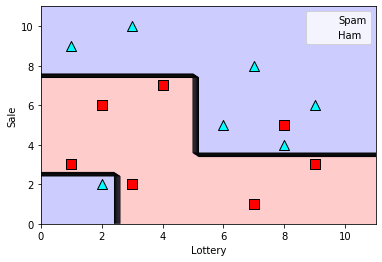

In [25]:
utils.plot_model(new_X, new_y, gradient_boosting_model)

In [26]:
estimators = gradient_boosting_model.estimators_

As an example, let us plot the first of the estimators.

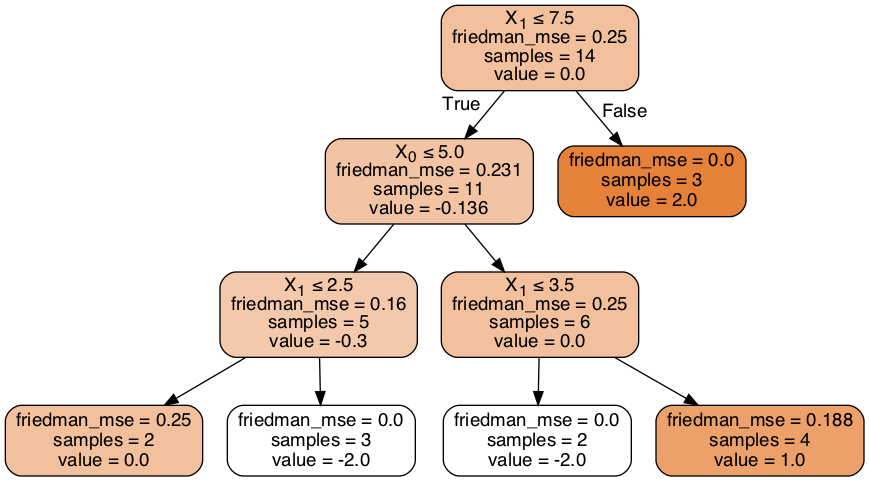

In [27]:
dot_data = StringIO()
export_graphviz(estimators[0][0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# XGBoost

In [28]:
import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=0, n_estimators=5)
xgboost_model.fit(new_X, new_y)
xgboost_model.score(new_X, new_y)

0.7142857142857143